Step 1: Setup and Load Data

In [1]:
!pip install prophet


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv to Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv


In [4]:
df = pd.read_csv("Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv")
df.head()

Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0  30/08/2024        16436       10705           225        19026    3925   
1  15/09/2023        15499       10671           267        18421    4519   
2  28/12/2021         1756        2352             0         3775       0   
3  11/01/2023        10536        8347           223        14072       0   
4  11/09/2021          820         612             0         1283       0   

   Other  
0   59.0  
1   61.0  
2   13.0  
3   48.0  
4   11.0

In [6]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')
df['Other'] = df['Other'].fillna(0)

Step 2: Exploratory Data Analysis

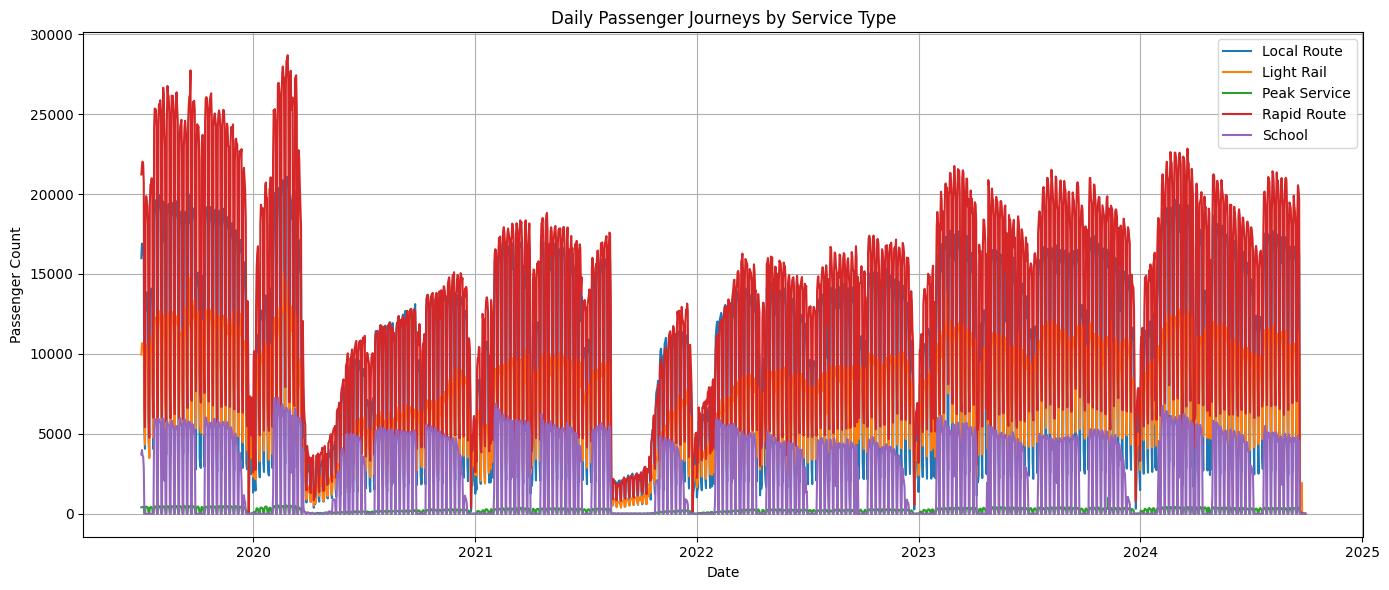

In [7]:
plt.figure(figsize=(14, 6))
for col in ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']:
    plt.plot(df['Date'], df[col], label=col)

plt.title("Daily Passenger Journeys by Service Type")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
df.describe()

Date   Local Route    Light Rail  Peak Service  \
count                 1918   1918.000000   1918.000000   1918.000000   
mean   2022-02-13 12:00:00   9891.395203   7195.446298    179.581335   
min    2019-07-01 00:00:00      1.000000      0.000000      0.000000   
25%    2020-10-22 06:00:00   3044.500000   4463.500000      0.000000   
50%    2022-02-13 12:00:00  11417.000000   7507.000000    193.000000   
75%    2023-06-07 18:00:00  15517.500000  10008.250000    313.750000   
max    2024-09-29 00:00:00  21070.000000  15154.000000   1029.000000   
std                    NaN   6120.715714   3345.616428    156.532738   

        Rapid Route       School        Other  
count   1918.000000  1918.000000  1918.000000  
mean   12597.213243  2352.694995    42.937956  
min        0.000000     0.000000     0.000000  
25%     6383.000000     0.000000    14.000000  
50%    13106.500000   567.500000    39.000000  
75%    17924.750000  4914.000000    67.750000  
max    28678.000000  7255.000000  1105.000000  
std     6720.494557  2494.766306    41.761911

In [9]:
df.isna().sum()

Date            0
Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
Other           0
dtype: int64

**Different types of Plots**

Line Plots (Individual Service Over Time)

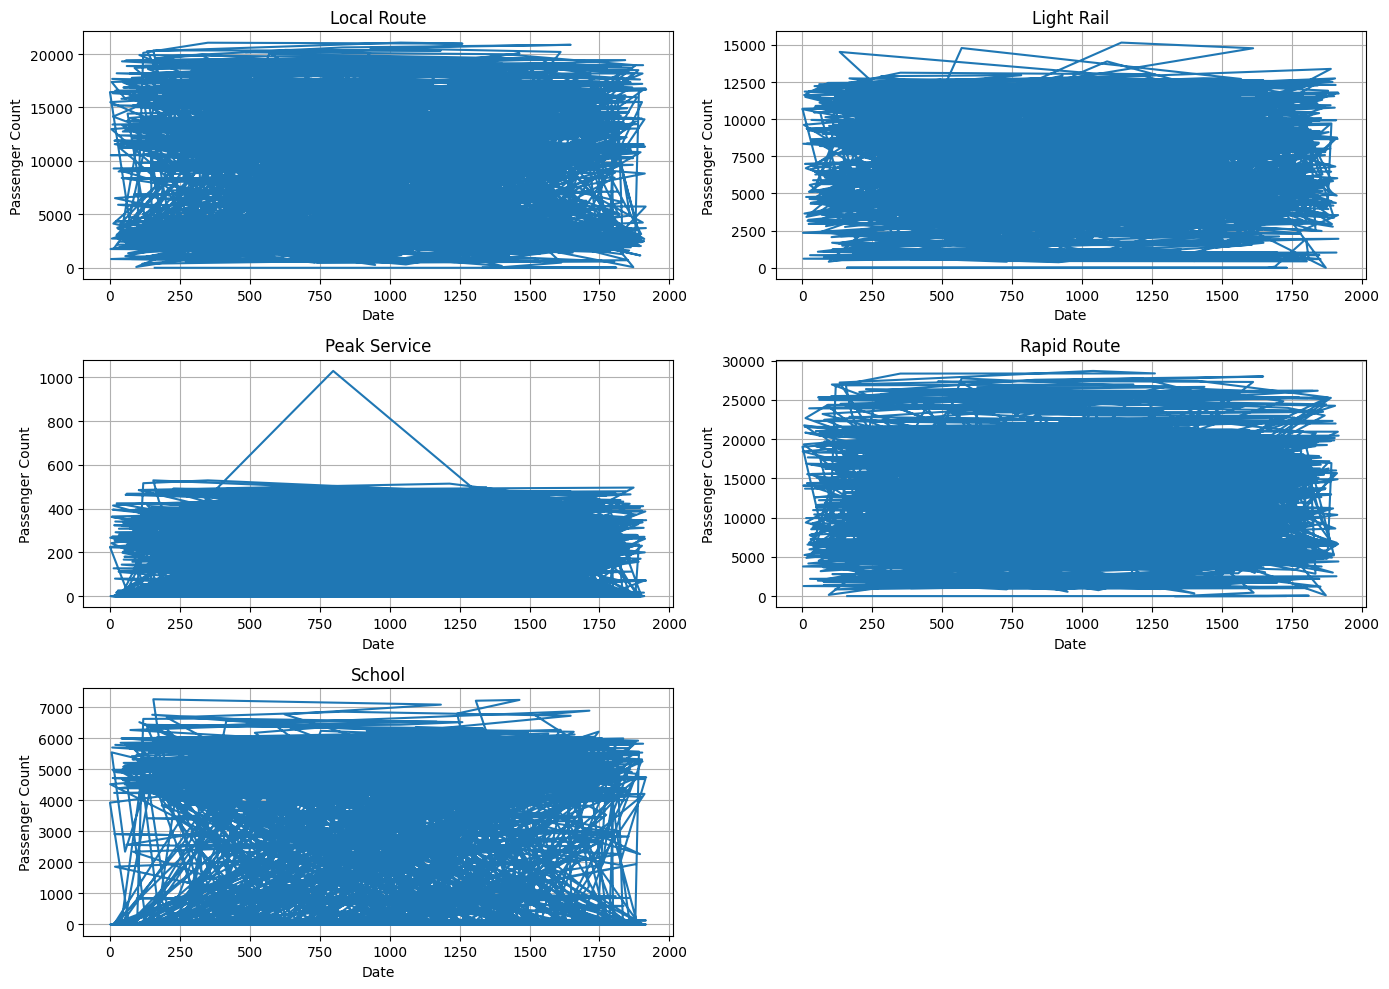

In [10]:
import matplotlib.pyplot as plt

services = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

plt.figure(figsize=(14, 10))
for i, service in enumerate(services):
    plt.subplot(3, 2, i+1)
    plt.plot(df.index, df[service], label=service)
    plt.title(service)
    plt.xlabel("Date")
    plt.ylabel("Passenger Count")
    plt.grid(True)

plt.tight_layout()
plt.show()

Stacked Area Plot (Total Contribution Over Time)

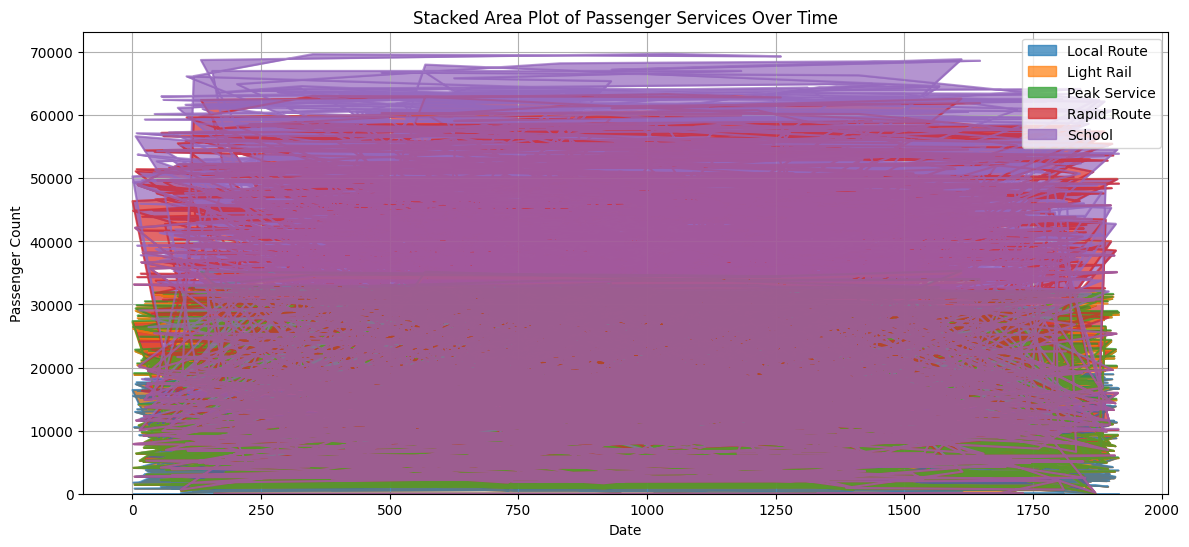

In [11]:
df[services].plot.area(stacked=True, figsize=(14, 6), alpha=0.7)
plt.title("Stacked Area Plot of Passenger Services Over Time")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.grid(True)
plt.show()

Box Plot by Day of the Week

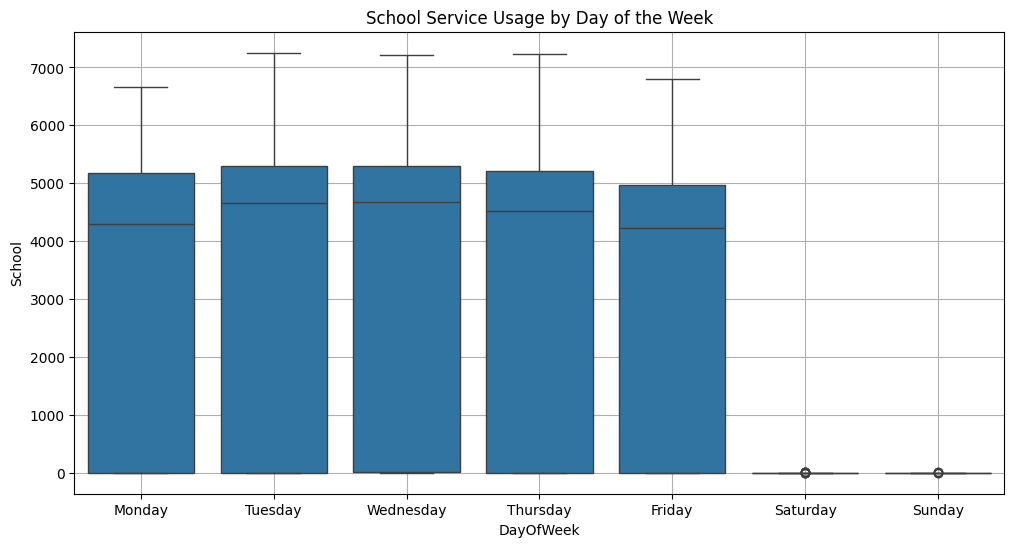

In [13]:
df_box = df.copy()
# Use the 'Date' column directly to get the day name
df_box['DayOfWeek'] = df_box['Date'].dt.day_name()

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_box, x='DayOfWeek', y='School', order=[
            'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("School Service Usage by Day of the Week")
plt.grid(True)
plt.show()

Heatmap: Monthly Trends

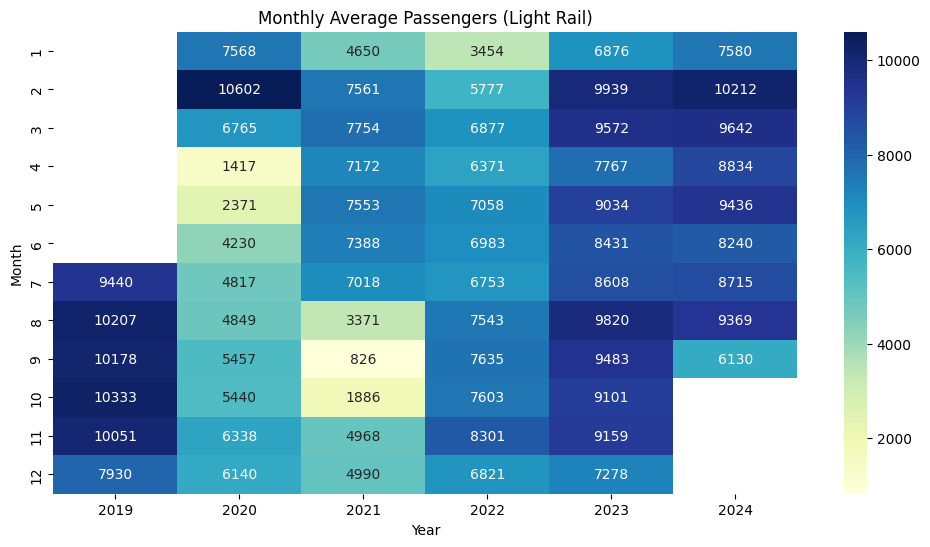

In [15]:
df_heat = df.copy()
# Access the year and month directly from the 'Date' column
df_heat['Year'] = df_heat['Date'].dt.year
df_heat['Month'] = df_heat['Date'].dt.month

pivot = df_heat.pivot_table(index='Month', columns='Year', values='Light Rail', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title("Monthly Average Passengers (Light Rail)")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

Step 3: Forecasting with Prophet (Local Route)

In [16]:
local_route_df = df[['Date', 'Local Route']].rename(columns={'Date': 'ds', 'Local Route': 'y'})
local_route_df.head()

ds      y
1013 2019-07-01  15987
1120 2019-07-02  16895
1451 2019-07-03  16613
1171 2019-07-04  16604
1523 2019-07-05  16040

In [17]:
from prophet import Prophet

model = Prophet()
model.fit(local_route_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/iwvbmzef.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/lar1fjyf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26924', 'data', 'file=/tmp/tmpwd72awx3/iwvbmzef.json', 'init=/tmp/tmpwd72awx3/lar1fjyf.json', 'output', 'file=/tmp/tmpwd72awx3/prophet_modelgv_iue66/prophet_model-20250603050719.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:07:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:07:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [18]:
future = model.make_future_dataframe(periods=30)
future.tail()

ds
1943 2024-10-25
1944 2024-10-26
1945 2024-10-27
1946 2024-10-28
1947 2024-10-29

In [19]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
1943 2024-10-25  16181.186431  12180.699446  20211.569803
1944 2024-10-26   6965.675939   3242.036116  10845.076521
1945 2024-10-27   5916.927876   1908.261387   9842.834947
1946 2024-10-28  15158.010828  10854.762435  19192.770710
1947 2024-10-29  16939.013474  13030.190422  21010.464599

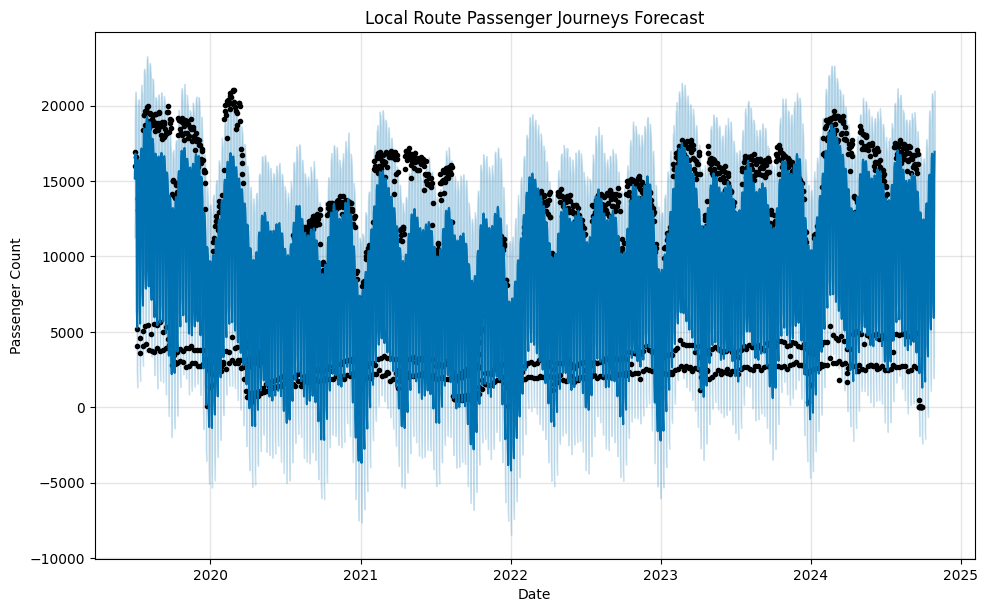

In [20]:
fig = model.plot(forecast)
plt.title('Local Route Passenger Journeys Forecast')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.show()

Plot Forecast Components (Trend, Weekly, Yearly Seasonality)

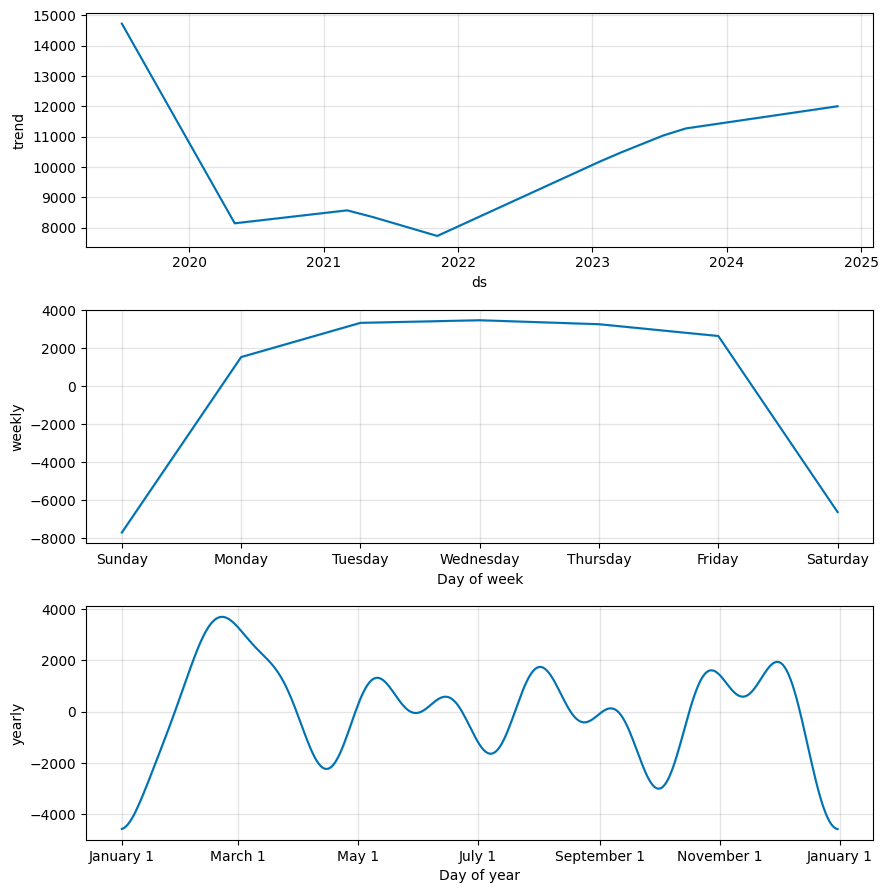

In [21]:
fig2 = model.plot_components(forecast)
plt.show()

In [22]:
from prophet import Prophet
import matplotlib.pyplot as plt

def forecast_service(service_name, df, periods=30):
    # Prepare data
    service_df = df[['Date', service_name]].rename(columns={'Date': 'ds', service_name: 'y'})

    # Initialize and fit model
    model = Prophet()
    model.fit(service_df)

    # Create future dataframe
    future = model.make_future_dataframe(periods=periods)

    # Predict
    forecast = model.predict(future)

    # Plot forecast
    fig = model.plot(forecast)
    plt.title(f'{service_name} Passenger Journeys Forecast')
    plt.xlabel('Date')
    plt.ylabel('Passenger Count')
    plt.show()

    # Plot components
    fig2 = model.plot_components(forecast)
    plt.show()

    return forecast

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/g4s43y04.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/54stn3ix.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1587', 'data', 'file=/tmp/tmpwd72awx3/g4s43y04.json', 'init=/tmp/tmpwd72awx3/54stn3ix.json', 'output', 'file=/tmp/tmpwd72awx3/prophet_modelesbogdvf/prophet_model-20250603051032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:10:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Forecasting for Local Route...


05:10:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


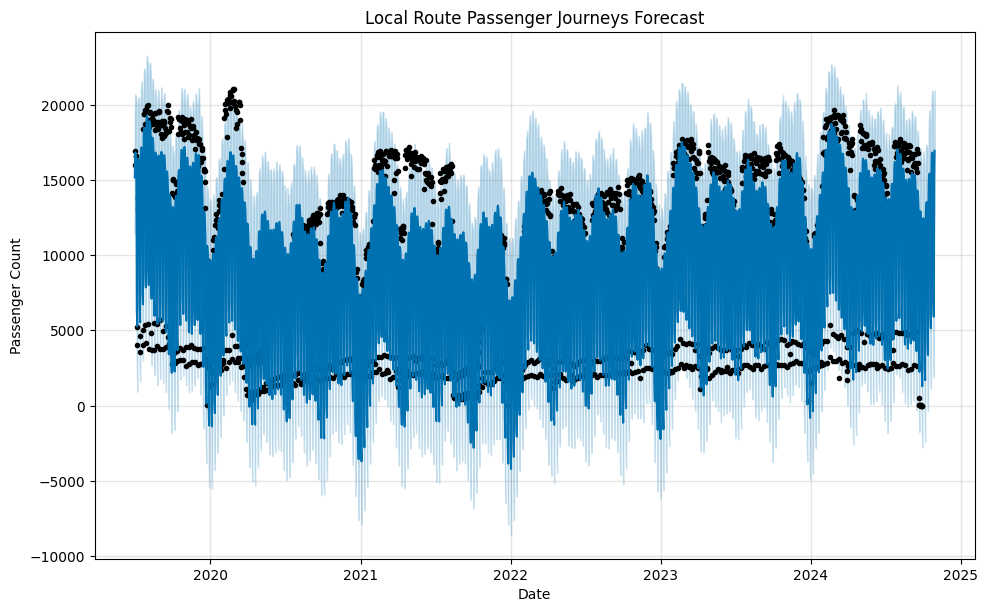

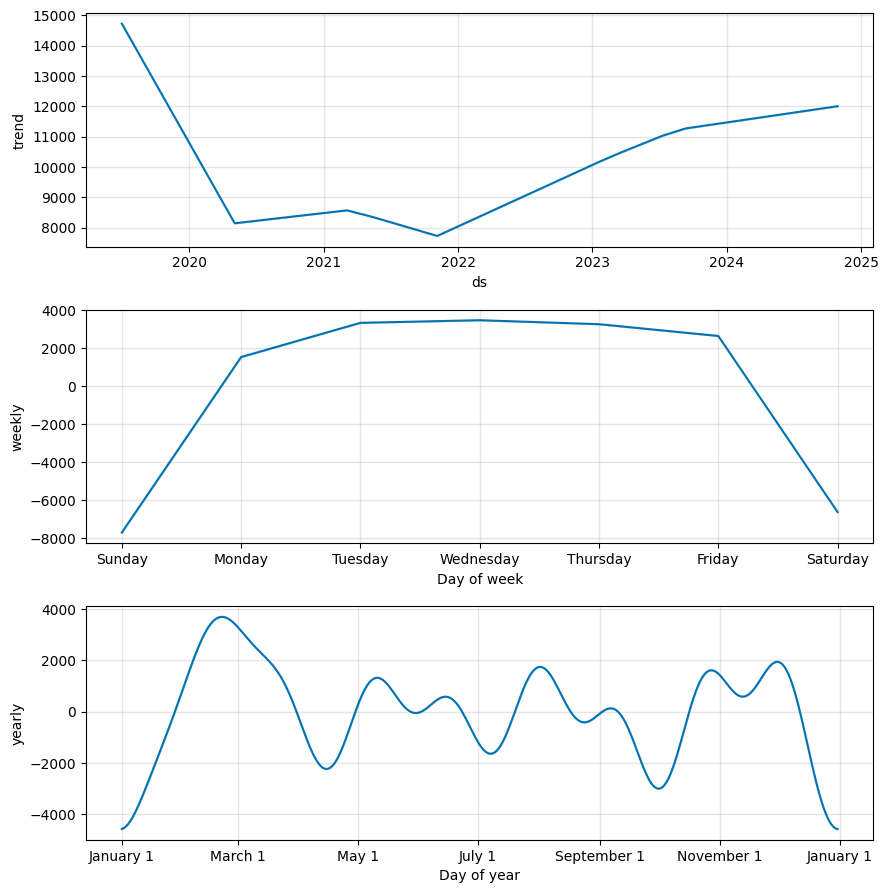

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/0371l5db.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/iu_ilhvw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92339', 'data', 'file=/tmp/tmpwd72awx3/0371l5db.json', 'init=/tmp/tmpwd72awx3/iu_ilhvw.json', 'output', 'file=/tmp/tmpwd72awx3/prophet_model5_4soxwi/prophet_model-20250603051034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:10:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Forecasting for Light Rail...


05:10:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


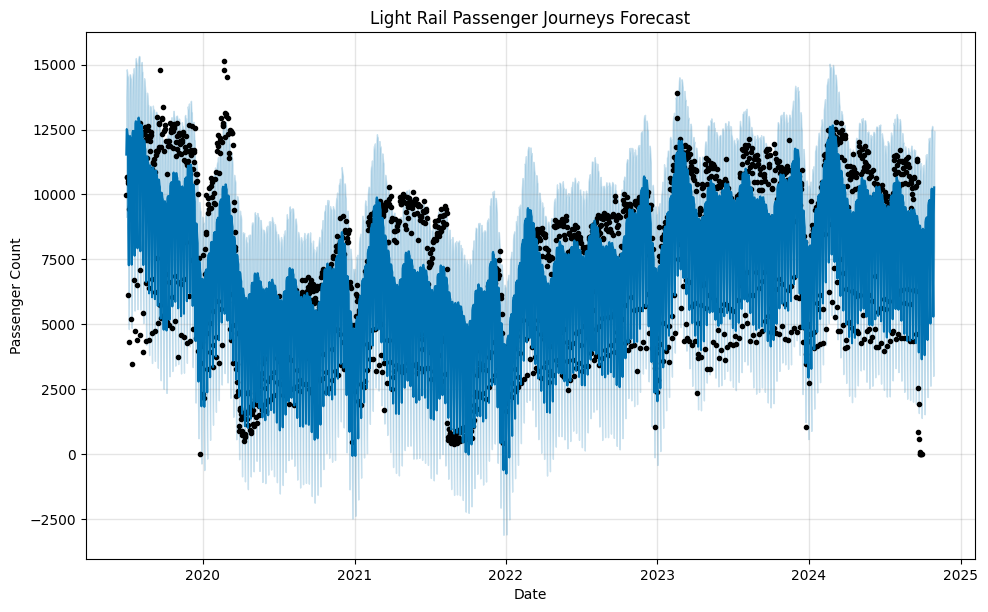

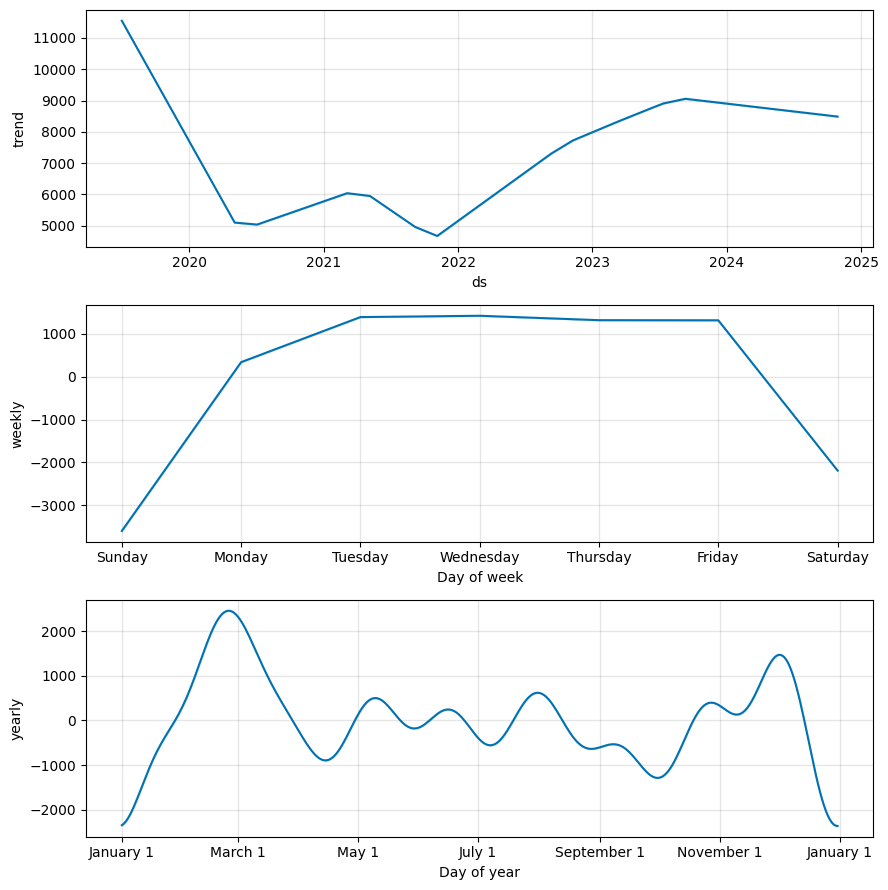

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/adpenmq0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/azpnhh59.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19778', 'data', 'file=/tmp/tmpwd72awx3/adpenmq0.json', 'init=/tmp/tmpwd72awx3/azpnhh59.json', 'output', 'file=/tmp/tmpwd72awx3/prophet_model3azj0xcc/prophet_model-20250603051036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:10:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Forecasting for Peak Service...


05:10:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


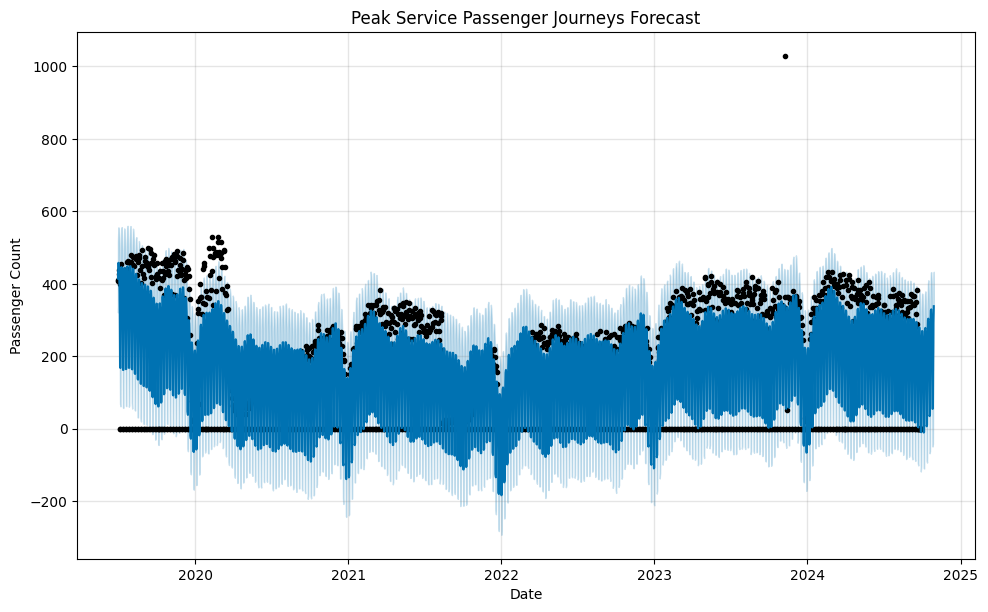

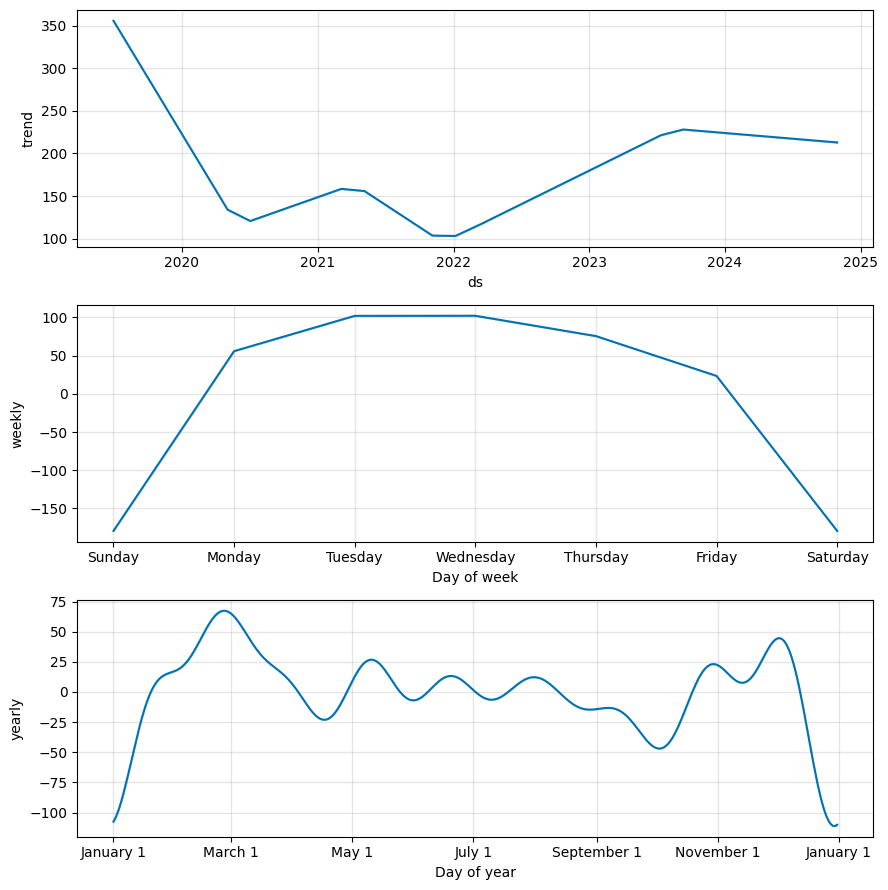

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/px6i48cd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/8b3_pd05.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52871', 'data', 'file=/tmp/tmpwd72awx3/px6i48cd.json', 'init=/tmp/tmpwd72awx3/8b3_pd05.json', 'output', 'file=/tmp/tmpwd72awx3/prophet_model6jmrdvnl/prophet_model-20250603051037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:10:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Forecasting for Rapid Route...


05:10:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


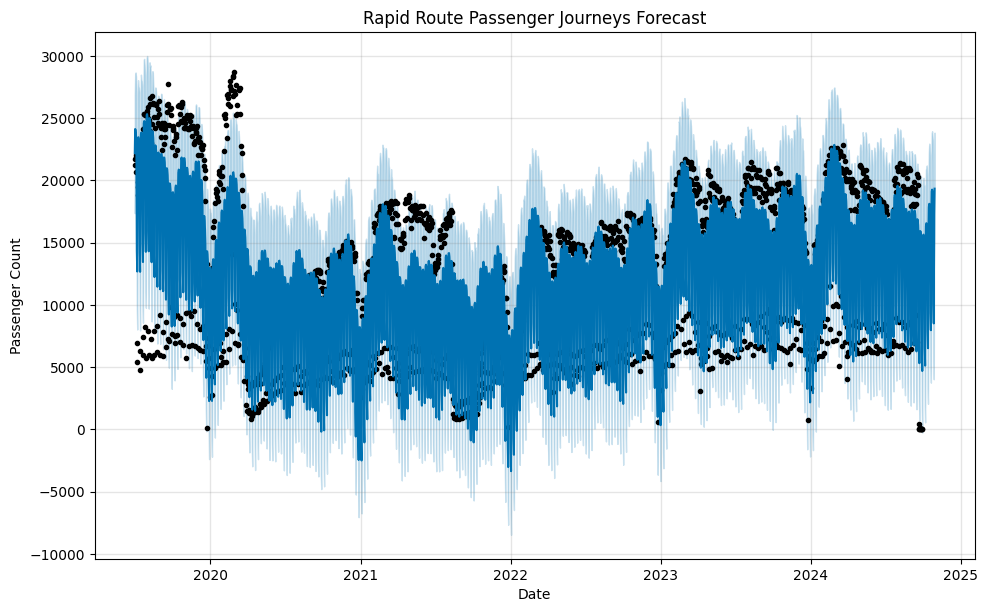

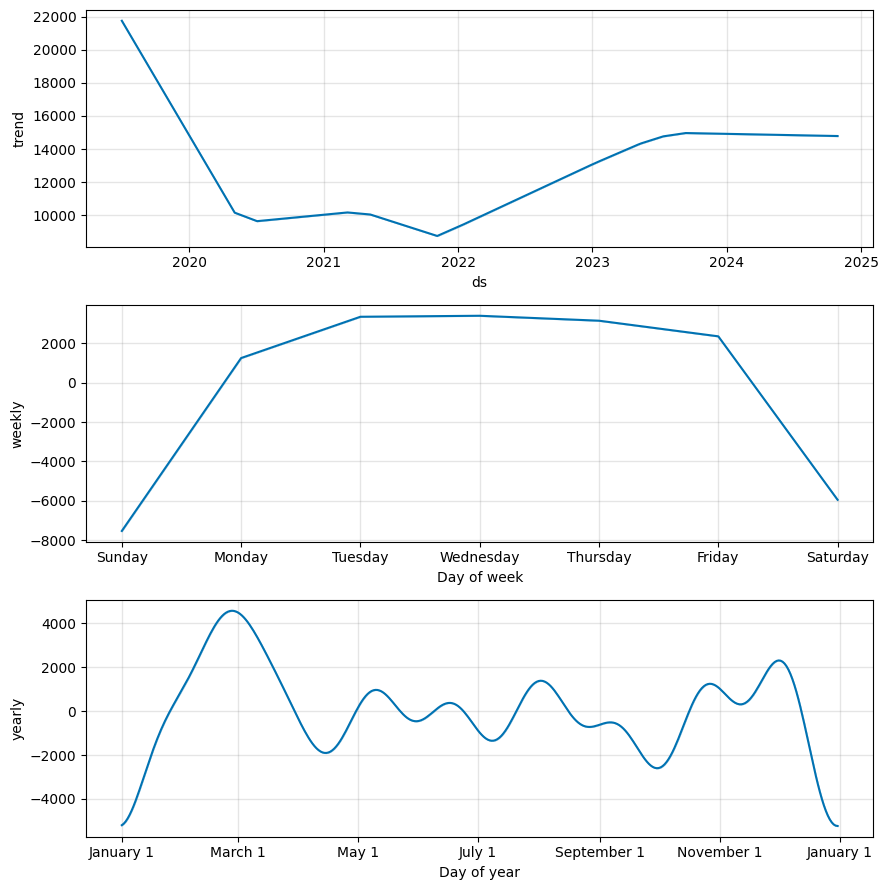

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/rqawuywm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/xbrcx5_e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48444', 'data', 'file=/tmp/tmpwd72awx3/rqawuywm.json', 'init=/tmp/tmpwd72awx3/xbrcx5_e.json', 'output', 'file=/tmp/tmpwd72awx3/prophet_model_jdmh29t/prophet_model-20250603051039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:10:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Forecasting for School...


05:10:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


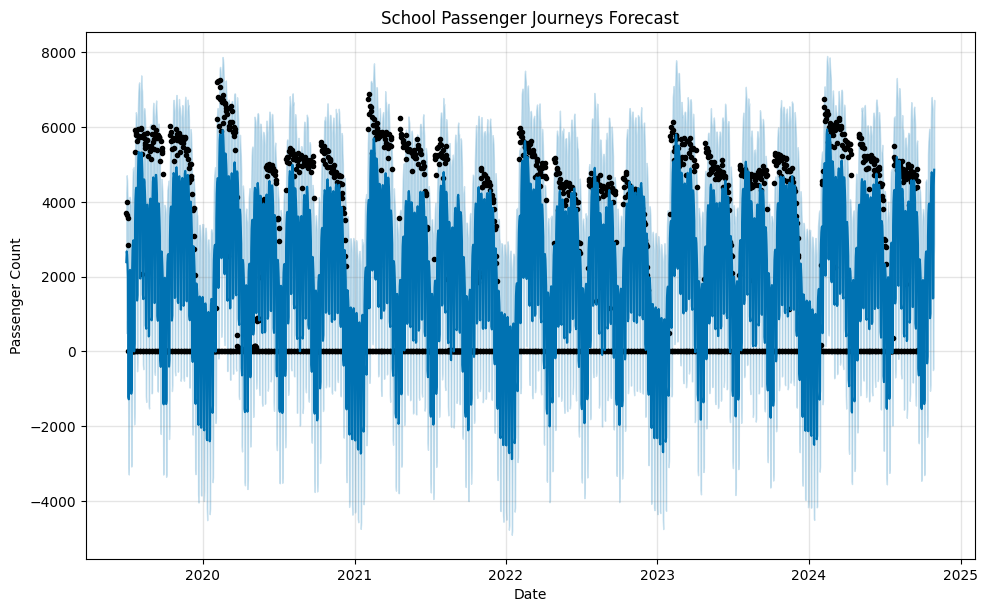

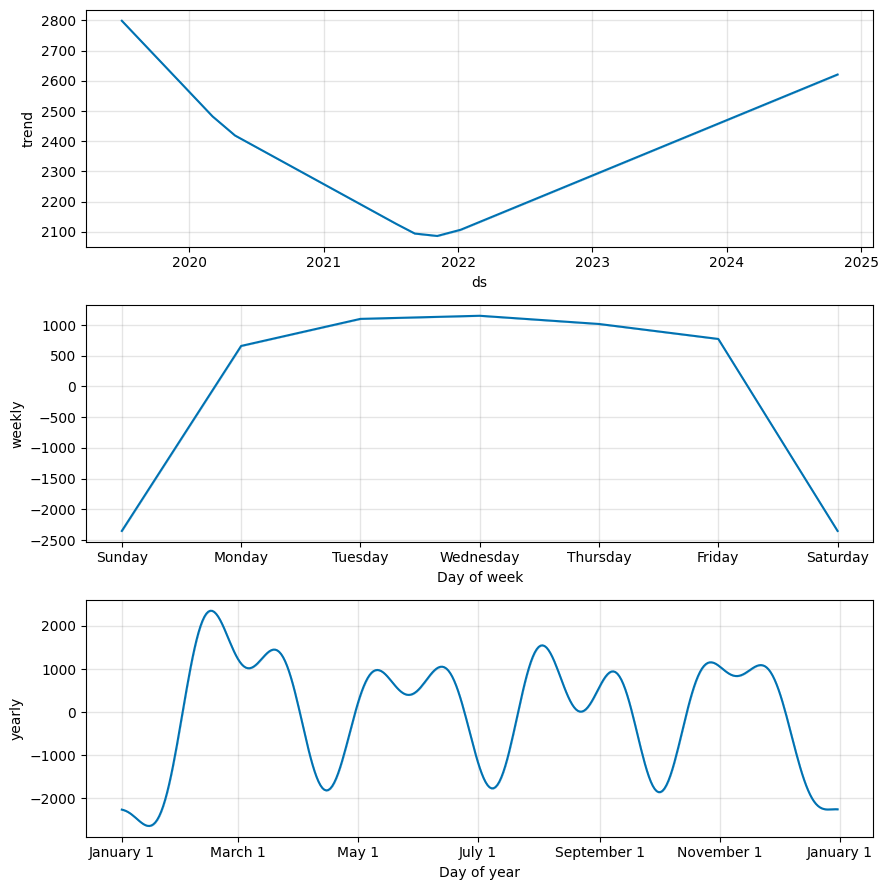

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/gw3nmpr7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/whyx4m6l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83029', 'data', 'file=/tmp/tmpwd72awx3/gw3nmpr7.json', 'init=/tmp/tmpwd72awx3/whyx4m6l.json', 'output', 'file=/tmp/tmpwd72awx3/prophet_modelidwc8uit/prophet_model-20250603051040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:10:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Forecasting for Other...


05:10:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


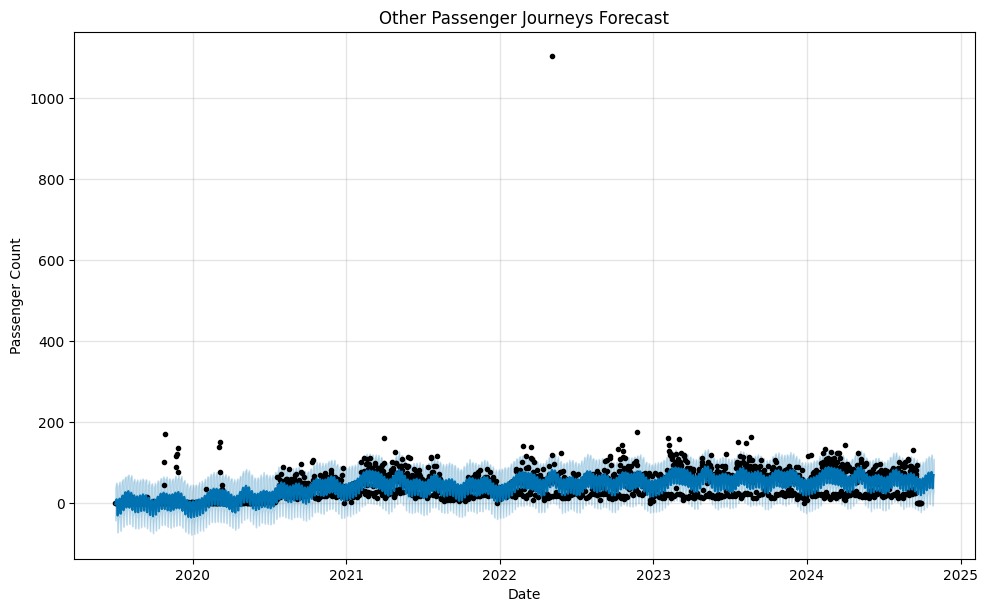

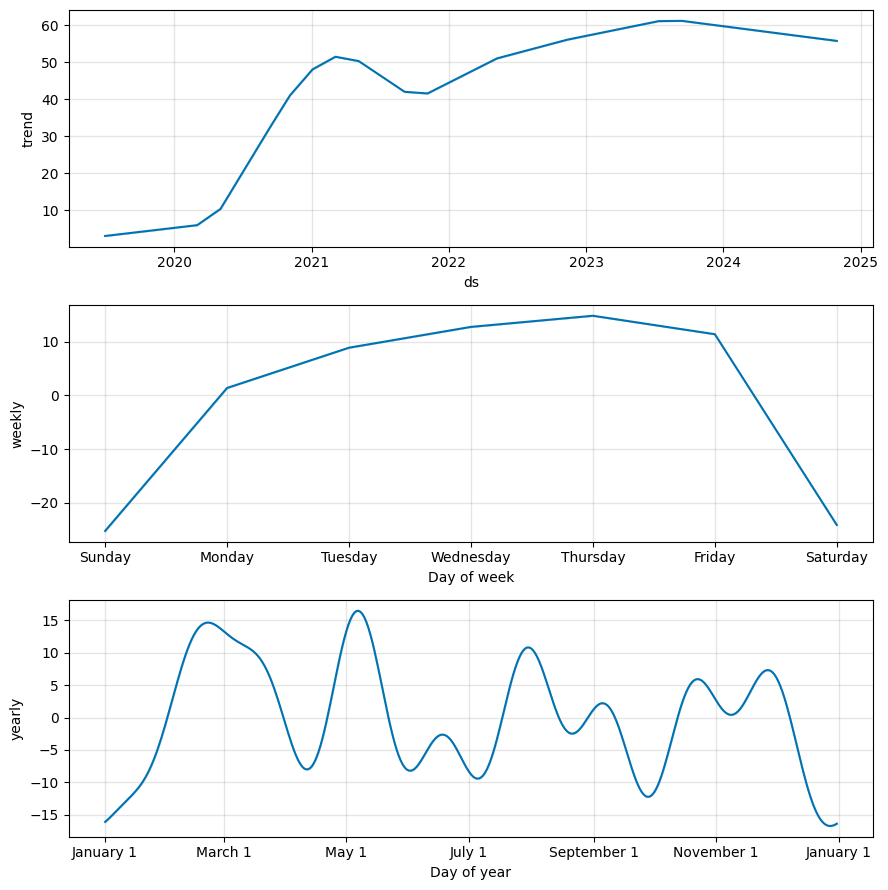

In [23]:
services = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']

forecasts = {}
for service in services:
    print(f"Forecasting for {service}...")
    forecasts[service] = forecast_service(service, df)

Step 4: Evaluate and Validate Your Forecasts

Step 4.1: Backtesting (Train-Test Split & Forecast Evaluation)

1. Split Data into Train and Test Sets

In [25]:
# Set test period (e.g., last 30 days)
test_days = 30

# Prepare data for Prophet
local_route_df = df[['Date', 'Local Route']].rename(columns={'Date': 'ds', 'Local Route': 'y'})

# Split data
train_df = local_route_df[:-test_days]
test_df = local_route_df[-test_days:]

print(f"Train period: {train_df['ds'].min()} to {train_df['ds'].max()}")
print(f"Test period: {test_df['ds'].min()} to {test_df['ds'].max()}")

Train period: 2019-07-01 00:00:00 to 2024-08-30 00:00:00
Test period: 2024-08-31 00:00:00 to 2024-09-29 00:00:00


2. Fit Model on Training Data

In [26]:
model = Prophet()
model.fit(train_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/d88lutvb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/qjjkssmy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35930', 'data', 'file=/tmp/tmpwd72awx3/d88lutvb.json', 'init=/tmp/tmpwd72awx3/qjjkssmy.json', 'output', 'file=/tmp/tmpwd72awx3/prophet_modelcy0q3b_7/prophet_model-20250603051326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:13:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:13:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


3. Create Future DataFrame Covering Test Period

In [27]:
future = model.make_future_dataframe(periods=test_days)
forecast = model.predict(future)

4. Compare Forecast vs Actuals & Calculate Metrics

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Merge forecast with actual test data
forecast_test = forecast.set_index('ds').loc[test_df['ds']]
actuals = test_df.set_index('ds')['y']

# Calculate error metrics
mae = mean_absolute_error(actuals, forecast_test['yhat'])
rmse = np.sqrt(mean_squared_error(actuals, forecast_test['yhat']))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 4075.16
RMSE: 6432.38


Plot Forecast vs Actuals

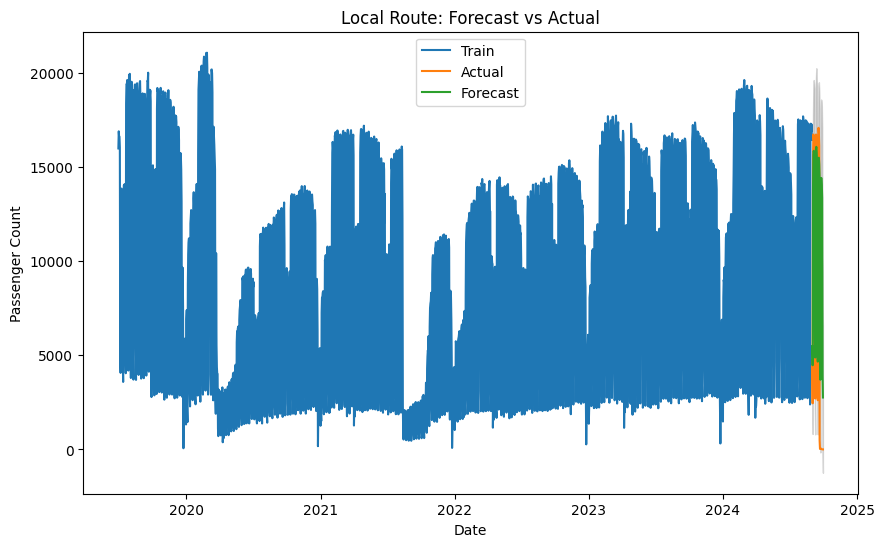

In [30]:
plt.figure(figsize=(10,6))
plt.plot(train_df['ds'], train_df['y'], label='Train')
plt.plot(test_df['ds'], test_df['y'], label='Actual')
plt.plot(forecast_test.index, forecast_test['yhat'], label='Forecast')
plt.fill_between(forecast_test.index, forecast_test['yhat_lower'], forecast_test['yhat_upper'], color='gray', alpha=0.3)
plt.legend()
plt.title('Local Route: Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.show()

Step 4.2: Fine-Tuning Prophet Models

In [31]:
model = Prophet(
    weekly_seasonality=True,
    yearly_seasonality=True,
    daily_seasonality=False  # Usually not needed for daily data unless hourly patterns matter
)

In [32]:
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [33]:
import pandas as pd

# Create a DataFrame with holiday dates
holidays = pd.DataFrame({
    'holiday': 'public_holiday',
    'ds': pd.to_datetime(['2025-01-01', '2025-12-25', '2025-04-25']),  # Add relevant holiday dates here
    'lower_window': 0,
    'upper_window': 1,  # effect lasts 2 days (holiday + day after)
})

model = Prophet(holidays=holidays)

In [34]:
model = Prophet(changepoint_prior_scale=0.05)  # Default is 0.05; increase for more flexibility, decrease to smooth trend

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/p6prtth6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/bqqi_sai.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53990', 'data', 'file=/tmp/tmpwd72awx3/p6prtth6.json', 'init=/tmp/tmpwd72awx3/bqqi_sai.json', 'output', 'file=/tmp/tmpwd72awx3/prophet_model9a8n50og/prophet_model-20250603051809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:18:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:18:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


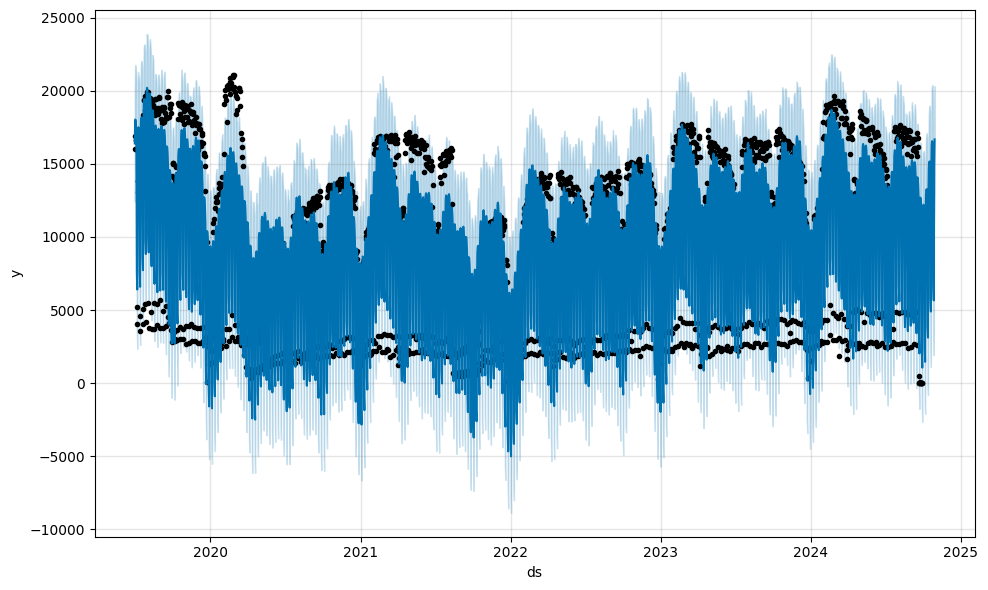

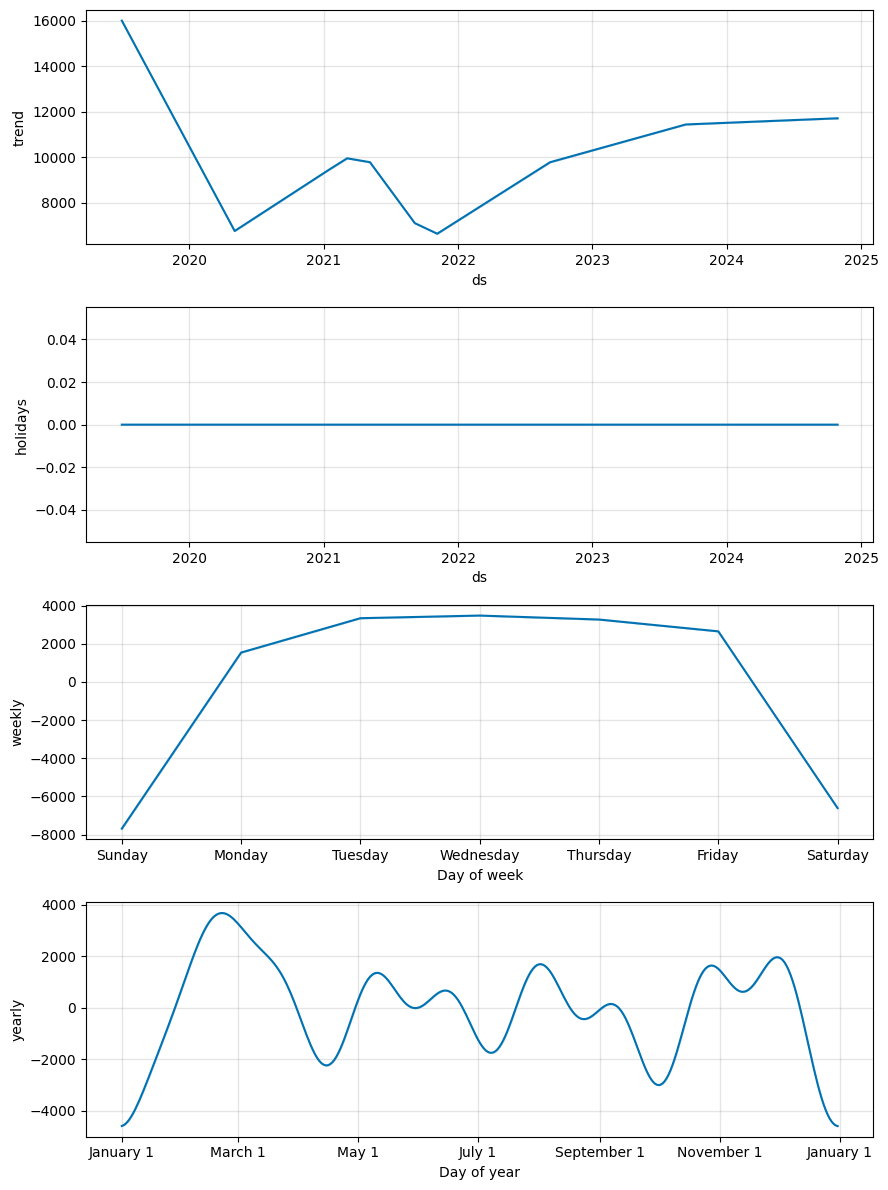

In [35]:
model = Prophet(
    weekly_seasonality=True,
    yearly_seasonality=True,
    holidays=holidays,
    changepoint_prior_scale=0.1
)

model.fit(local_route_df)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)
plt.show()
model.plot_components(forecast)
plt.show()

Fine-Tuning Forecasts for All Services Using Prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/n530at18.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/zcvg3tt2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94587', 'data', 'file=/tmp/tmpwd72awx3/n530at18.json', 'init=/tmp/tmpwd72awx3/zcvg3tt2.json', 'output', 'file=/tmp/tmpwd72awx3/prophet_modelww9pbhmk/prophet_model-20250603054144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


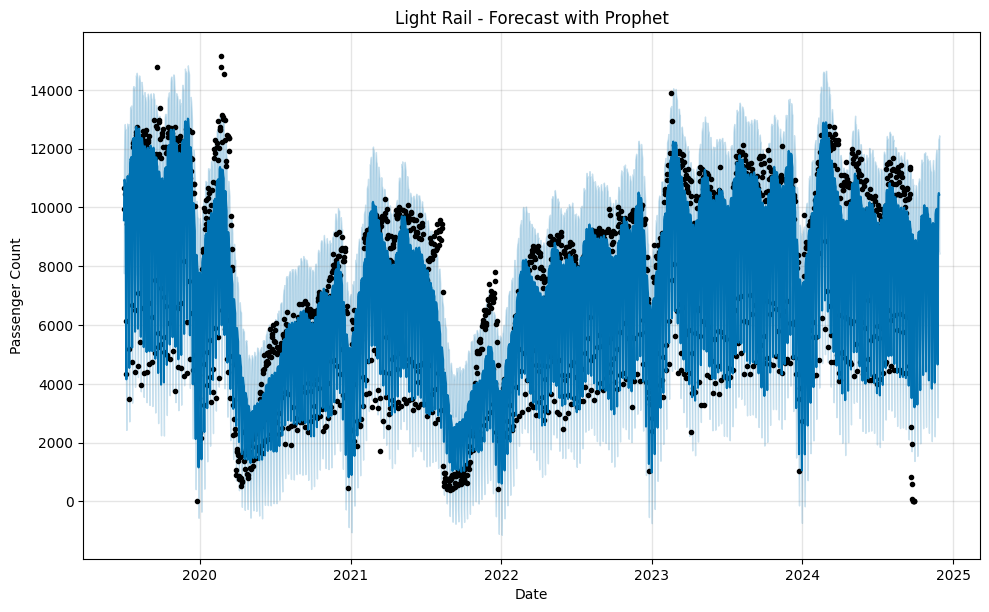

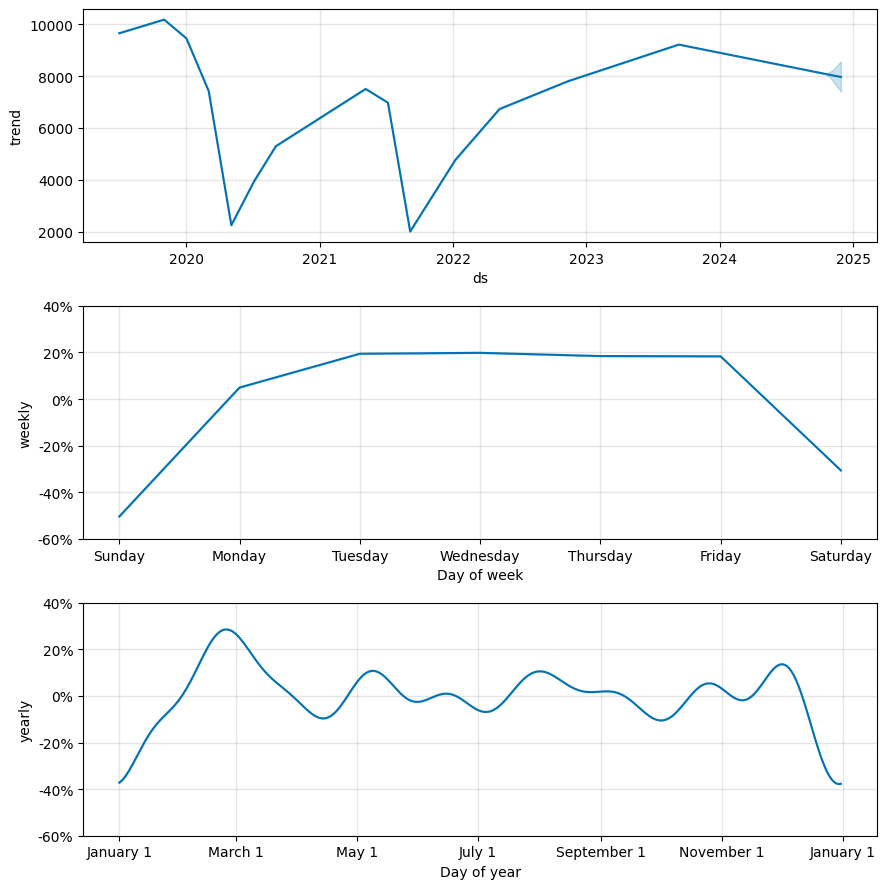

In [36]:
from prophet import Prophet

# Replace with the service you're working on
service = 'Light Rail'

# Prepare the data
df_service = df[['Date', service]].rename(columns={'Date': 'ds', service: 'y'})

# Initialize the model with tuned parameters
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative',  # or 'additive' if fits better
    changepoint_prior_scale=0.3         # tune this value if needed
)

# Fit the model
model.fit(df_service)

# Make future dataframe
future = model.make_future_dataframe(periods=60)  # Forecast 60 days
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title(f"{service} - Forecast with Prophet")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.grid(True)
plt.show()

# Plot components
fig2 = model.plot_components(forecast)

1. Light Rail Forecast

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/tn62uifo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/dk3qks6x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40463', 'data', 'file=/tmp/tmpwd72awx3/tn62uifo.json', 'init=/tmp/tmpwd72awx3/dk3qks6x.json', 'output', 'file=/tmp/tmpwd72awx3/prophet_modeltekcumhh/prophet_model-20250603054307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:43:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:43:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


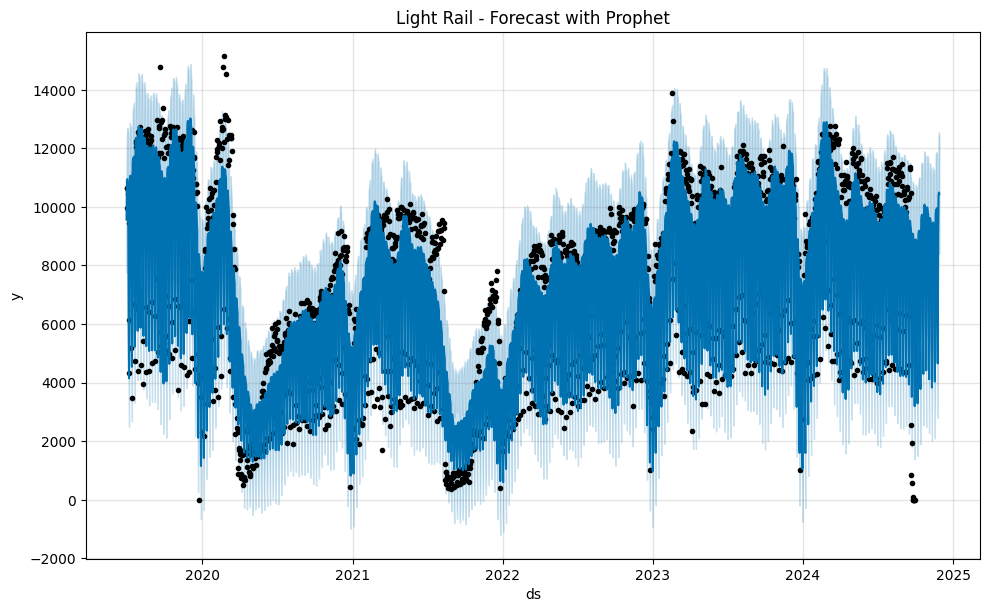

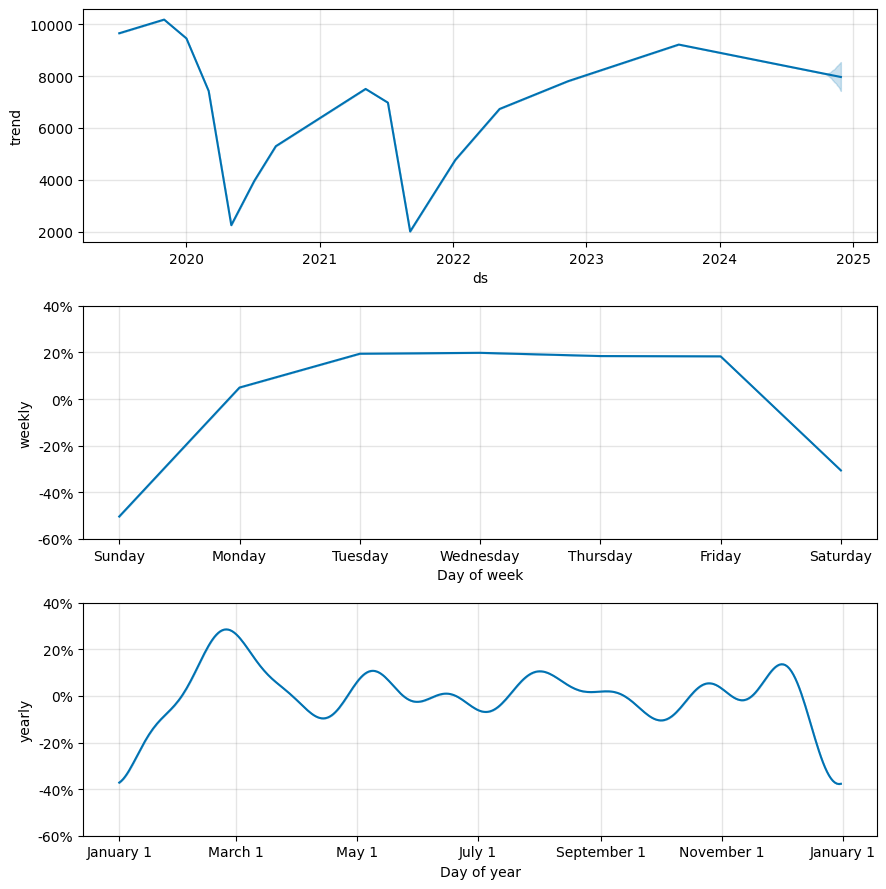

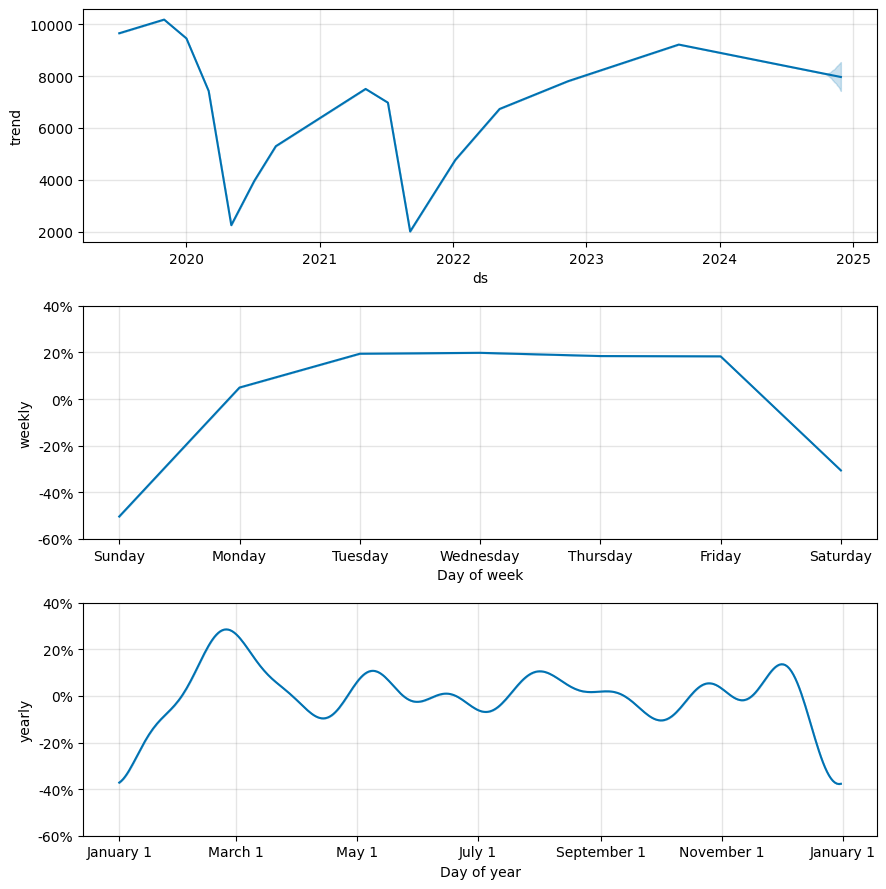

In [37]:
from prophet import Prophet

# Prepare data
df_light = df[['Date', 'Light Rail']].rename(columns={'Date': 'ds', 'Light Rail': 'y'})

# Initialize model
model_light = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.3
)

# Fit and forecast
model_light.fit(df_light)
future_light = model_light.make_future_dataframe(periods=60)
forecast_light = model_light.predict(future_light)

# Plot forecast
model_light.plot(forecast_light)
plt.title("Light Rail - Forecast with Prophet")
plt.grid(True)
plt.show()

# Plot components
model_light.plot_components(forecast_light)

2. Peak Service Forecast

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/9wmmqdas.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/0jduw561.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17970', 'data', 'file=/tmp/tmpwd72awx3/9wmmqdas.json', 'init=/tmp/tmpwd72awx3/0jduw561.json', 'output', 'file=/tmp/tmpwd72awx3/prophet_modellb1fh58c/prophet_model-20250603054407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:44:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:44:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


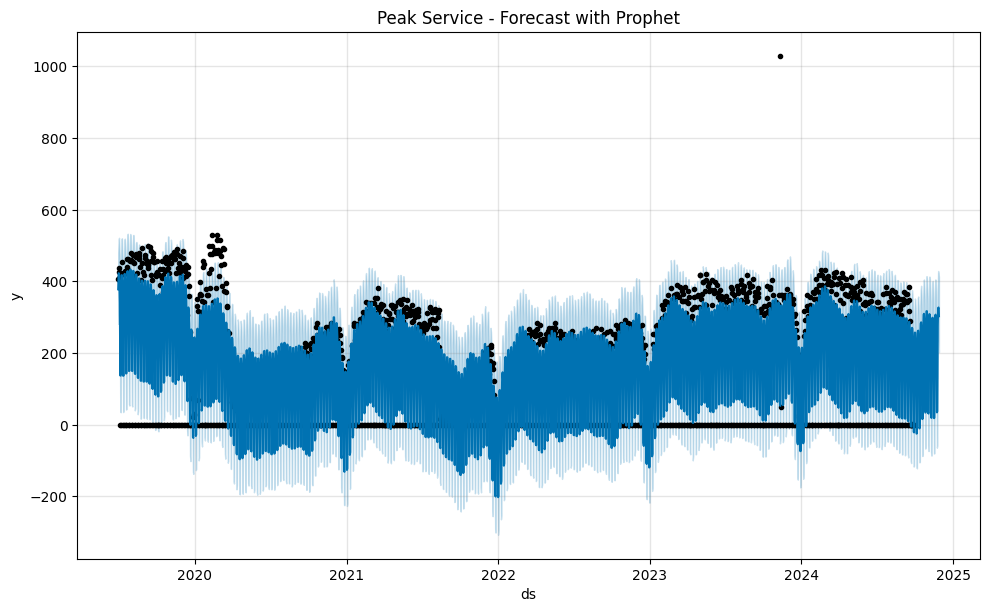

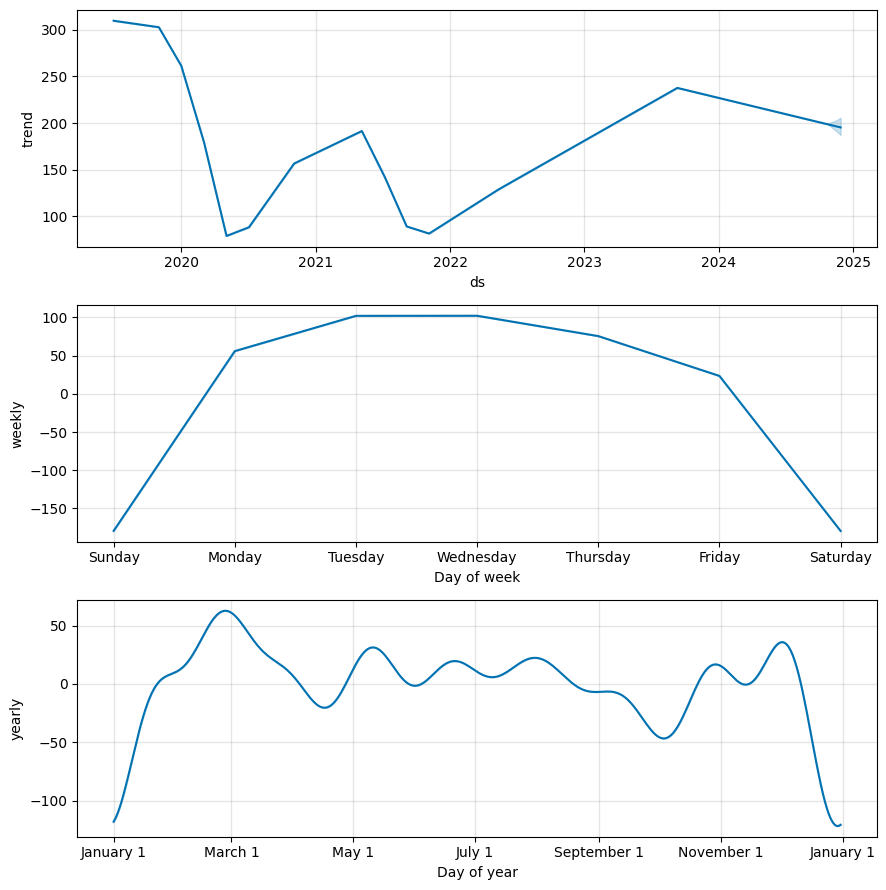

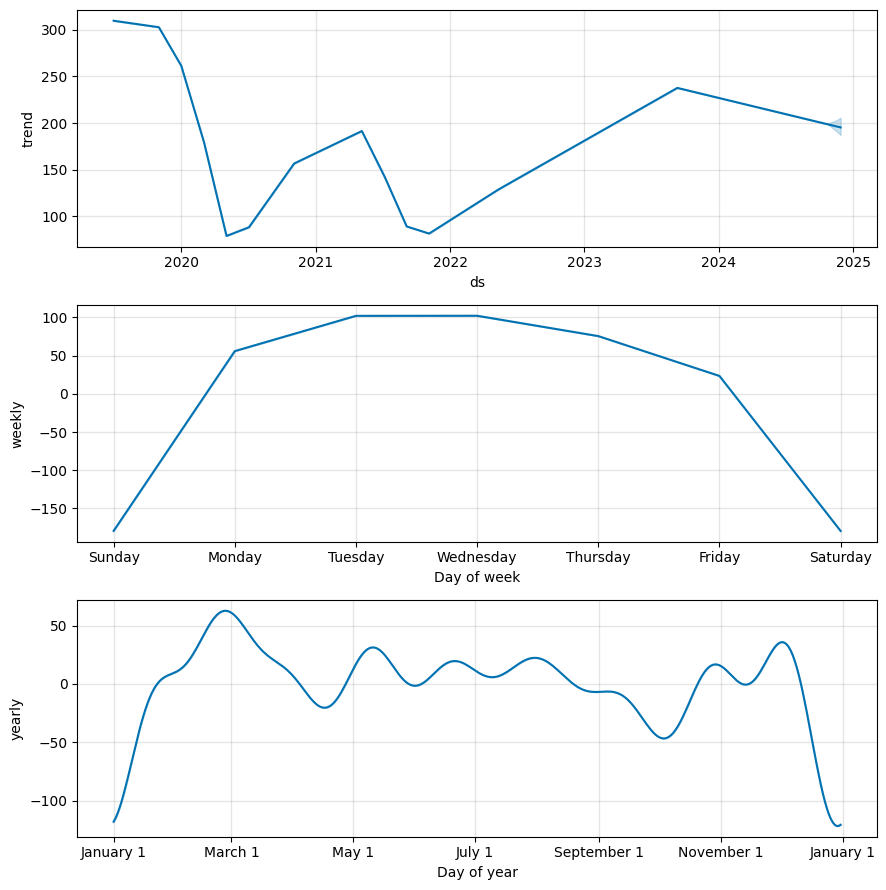

In [38]:
df_peak = df[['Date', 'Peak Service']].rename(columns={'Date': 'ds', 'Peak Service': 'y'})

model_peak = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    seasonality_mode='additive',
    changepoint_prior_scale=0.2
)

model_peak.fit(df_peak)
future_peak = model_peak.make_future_dataframe(periods=60)
forecast_peak = model_peak.predict(future_peak)

model_peak.plot(forecast_peak)
plt.title("Peak Service - Forecast with Prophet")
plt.grid(True)
plt.show()

model_peak.plot_components(forecast_peak)

3. Rapid Route Forecast

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/7oq35va2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/d771eerq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99437', 'data', 'file=/tmp/tmpwd72awx3/7oq35va2.json', 'init=/tmp/tmpwd72awx3/d771eerq.json', 'output', 'file=/tmp/tmpwd72awx3/prophet_modelhn26m470/prophet_model-20250603054458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:44:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:44:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


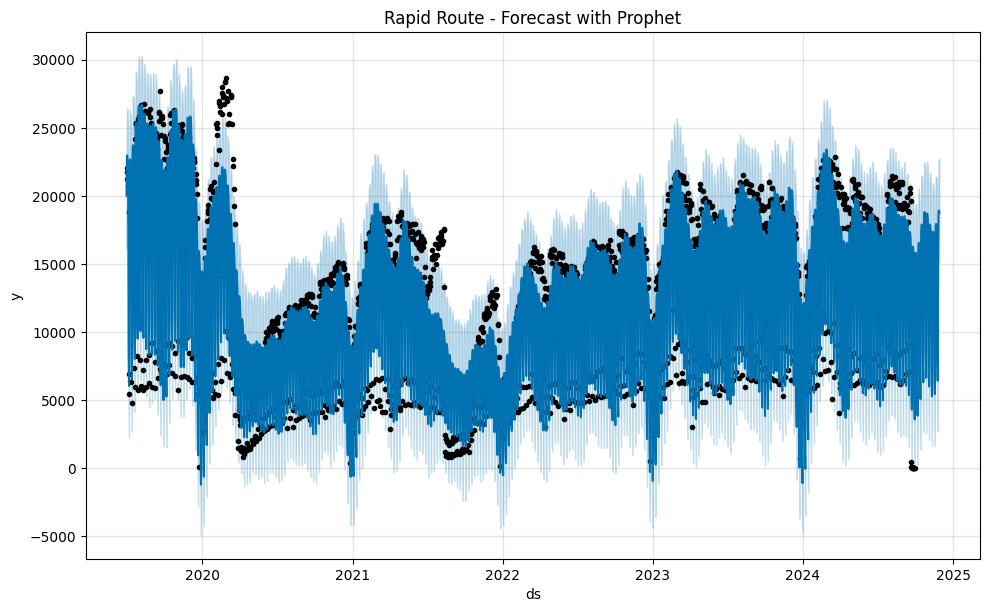

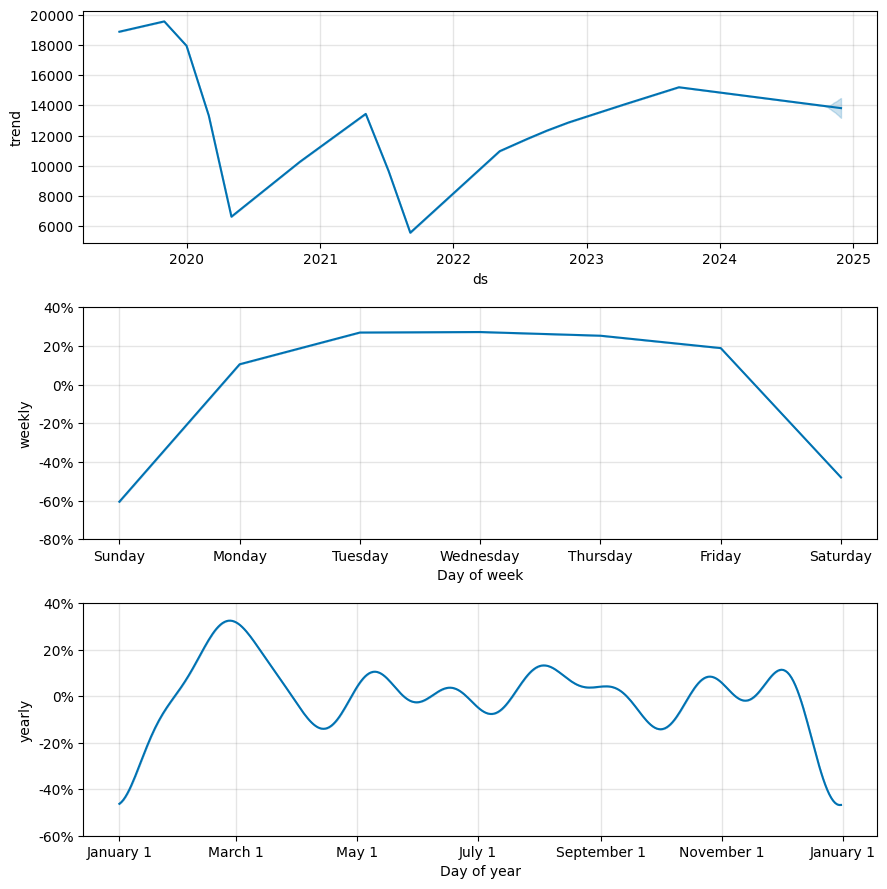

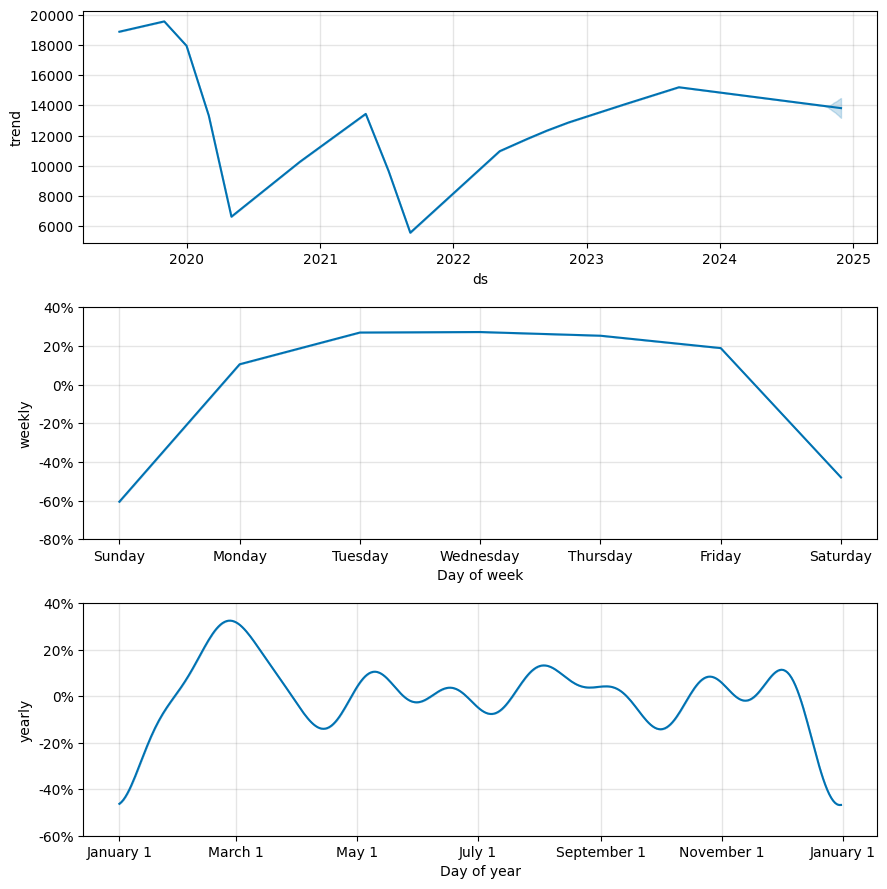

In [39]:
df_rapid = df[['Date', 'Rapid Route']].rename(columns={'Date': 'ds', 'Rapid Route': 'y'})

model_rapid = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.15
)

model_rapid.fit(df_rapid)
future_rapid = model_rapid.make_future_dataframe(periods=60)
forecast_rapid = model_rapid.predict(future_rapid)

model_rapid.plot(forecast_rapid)
plt.title("Rapid Route - Forecast with Prophet")
plt.grid(True)
plt.show()

model_rapid.plot_components(forecast_rapid)

4. School Service Forecast

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/8_l8utni.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd72awx3/nshy4qek.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74325', 'data', 'file=/tmp/tmpwd72awx3/8_l8utni.json', 'init=/tmp/tmpwd72awx3/nshy4qek.json', 'output', 'file=/tmp/tmpwd72awx3/prophet_modellu2gijxz/prophet_model-20250603054529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:45:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:45:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


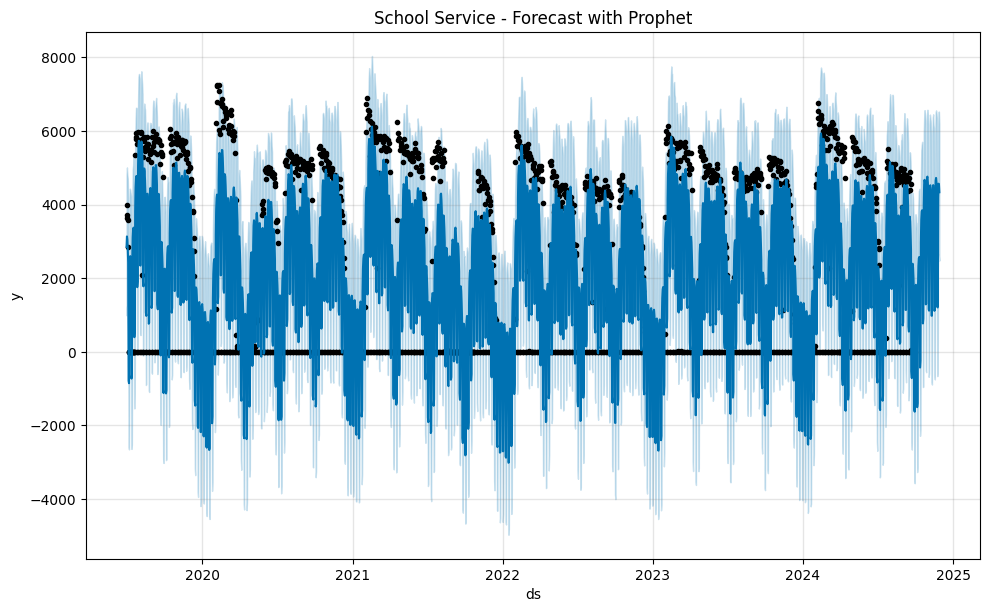

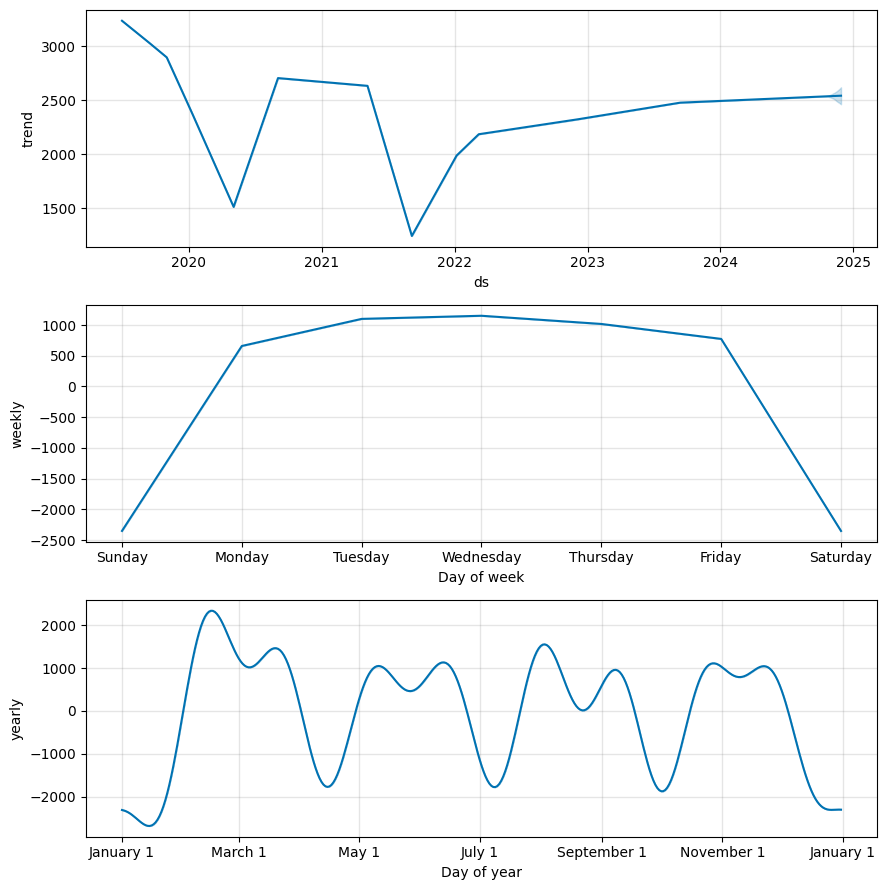

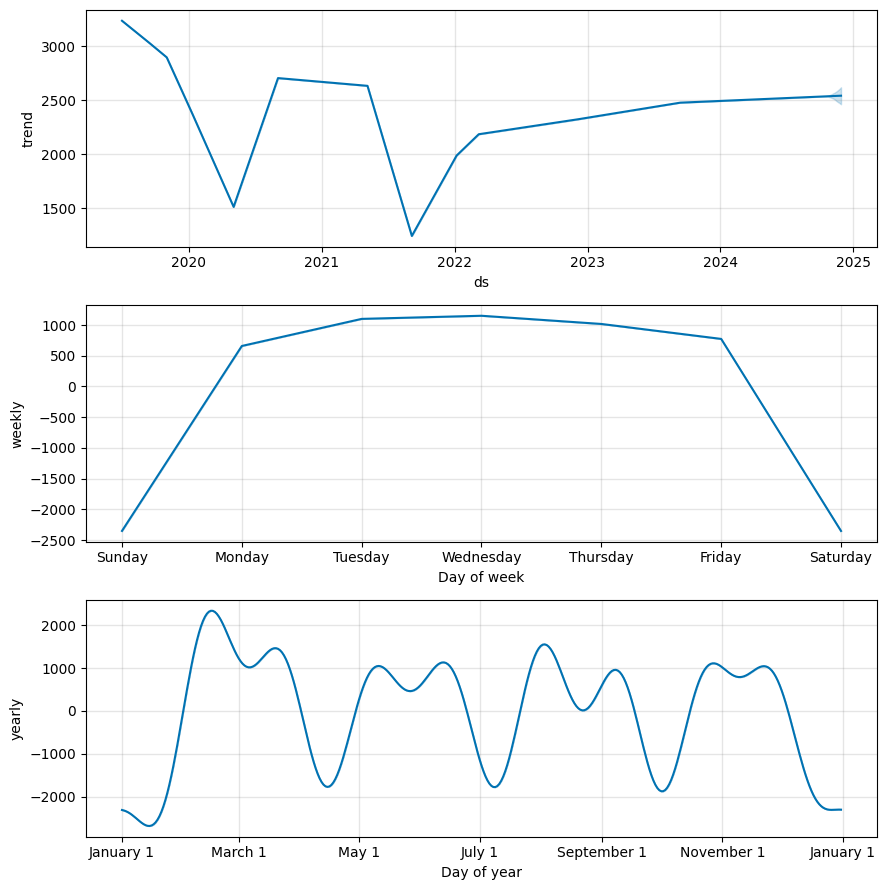

In [40]:
df_school = df[['Date', 'School']].rename(columns={'Date': 'ds', 'School': 'y'})

model_school = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    seasonality_mode='additive',
    changepoint_prior_scale=0.5
)

model_school.fit(df_school)
future_school = model_school.make_future_dataframe(periods=60)
forecast_school = model_school.predict(future_school)

model_school.plot(forecast_school)
plt.title("School Service - Forecast with Prophet")
plt.grid(True)
plt.show()

model_school.plot_components(forecast_school)

Step 1: Combine All Forecasts

In [41]:
# Combine forecasts
combined = pd.DataFrame()
combined['Date'] = forecast_light['ds']

combined['Light Rail'] = forecast_light['yhat']
combined['Peak Service'] = forecast_peak['yhat']
combined['Rapid Route'] = forecast_rapid['yhat']
combined['School'] = forecast_school['yhat']
combined['Local Route'] = forecast['yhat']  # from your original Local Route forecast

Step 2: Plot All Forecasts Together

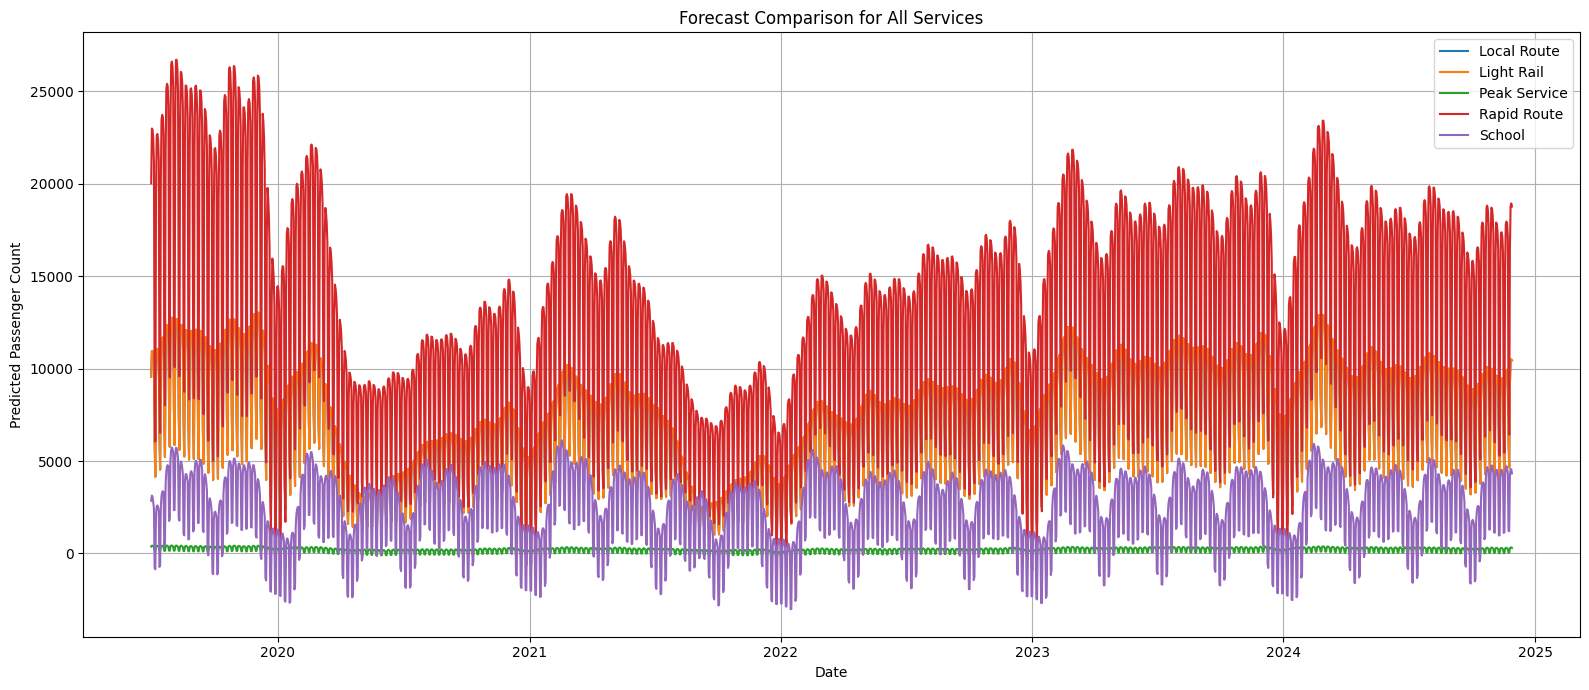

In [42]:
plt.figure(figsize=(16, 7))

for col in ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']:
    plt.plot(combined['Date'], combined[col], label=col)

plt.title("Forecast Comparison for All Services")
plt.xlabel("Date")
plt.ylabel("Predicted Passenger Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()